# Derived fields and values

In this tutorial, we show how derived fields and values can be computed afetr the micromagnetic system is defined.

## Simulation

First of all, as usual, we import `oommfc` and `discretisedfield`.

In [1]:
import hublib.use
%use oommf-1.2b0

import oommfc as oc
import discretisedfield as df

In [2]:
# We need this because this example is running in a read-only directory.
# You should not normally do this.
import os
try:
    os.mkdir('/tmp/oommf')
except:
    pass
os.chdir('/tmp/oommf')

We define the cube mesh with edge length $10 \,\text{nm}$ and cell discretisation edge $1 \,\text{nm}$.

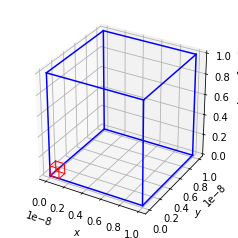

In [3]:
mesh = oc.Mesh(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9), cell=(1e-9, 1e-9, 1e-9))

# Plot the mesh.
%matplotlib inline
mesh

Now we define the system object and its Hamiltonian.

In [4]:
system = oc.System(name="system")

A = 1e-11
H = (0.1/oc.mu0, 0, 0)
K1 = 1e3
u = (1, 1, 1)
system.hamiltonian = oc.Exchange(A) + \
                     oc.Demag() + \
                     oc.Zeeman(H) + \
                     oc.UniaxialAnisotropy(K1=K1, u=u)

We will now intialise the system in $(0, 0, 1)$ direction and relax the magnetisation.

In [5]:
Ms = 8e5
system.m = df.Field(mesh, value=(0,0,1), norm=Ms)

## Effective field

Total effective field is:

2018/5/24 23:57: Calling OOMMF (system/system.mif) ... [3.5s]


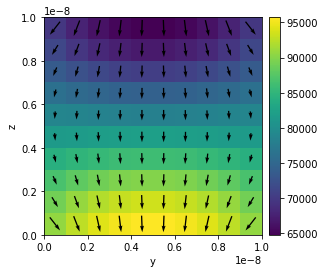

In [6]:
system.hamiltonian.effective_field.plot_plane("x")

Whereas, the individual exchange effective field is:

In [7]:
Hex_eff = system.hamiltonian.exchange.effective_field

2018/5/24 23:57: Calling OOMMF (system/system.mif) ... [5.4s]


Because we initialised the system with the uniform state, we expect this effective field to be zero.

In [8]:
Hex_eff.average

(0.0, 0.0, 0.0)

## Relax the system

In [9]:
md = oc.MinDriver()
md.drive(system)

2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [5.9s]


Compute the energy (and demonstrate that the energy decreased) and plot its magnetisation:

2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.2s]
The system's energy is 5.352855331445175e-20 J.


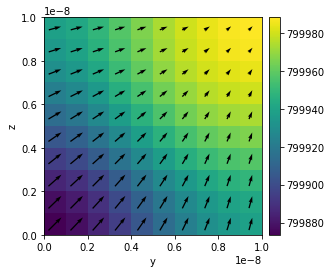

In [10]:
E = system.hamiltonian.energy
print("The system's energy is {} J.".format(E))

system.m.plot_plane("x")

## Computing energies of individual term

For instance, the exchange energy is:

In [11]:
system.hamiltonian.exchange.energy

2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.8s]


1.1217019010159577e-21

We can also chack the sum of all individual energy terms and check if it the same as the total energy.

In [12]:
total_energy = 0
for term in system.hamiltonian.terms:
    total_energy += term.energy
    
print("The sum of energy terms is {} J.".format(total_energy))
print("The system's energy is {} J.".format(system.hamiltonian.energy))

2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.1s]
2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [5.3s]
2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.6s]
2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.4s]
The sum of energy terms is 5.352855331445175e-20 J.
2018/5/24 23:58: Calling OOMMF (system/system.mif) ... [4.5s]
The system's energy is 5.352855331445175e-20 J.


<hr>
Cleaning up.  Temporary files were written.  You may want to remove them.

In [13]:
!rm -rf system